# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("sinasc_RO_2019.csv")
df.head()
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'class_asfixia'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'class_asfixia'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'class_asfixia'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'class_asfixia'] = 'normal'
df[['APGAR5','class_asfixia']]

,APGAR5,class_asfixia
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
...,...,...
27023,9.0,normal
27024,9.0,normal
27025,10.0,normal
27026,9.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

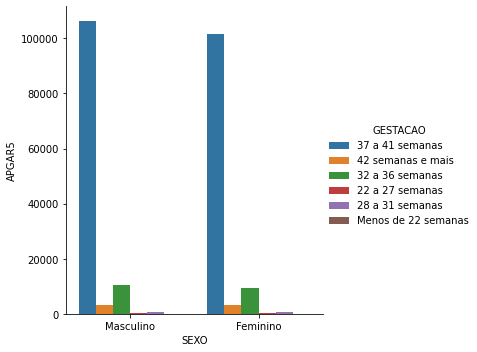

In [3]:
sns.catplot(x='SEXO', y='APGAR5'
            , hue = 'GESTACAO'
            , kind='bar'
            , estimator = sum
            , ci = None
            ,data=df
           )


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

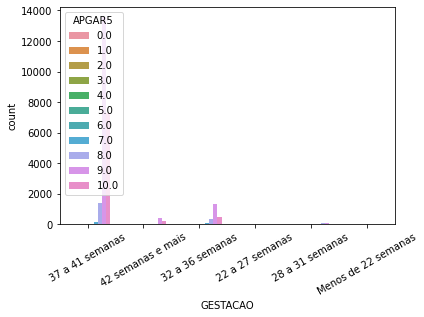

In [4]:
plt.close('all')
fig, ax = plt.subplots()
sns.countplot(ax=ax, x='GESTACAO'
              , hue = 'APGAR5'
              , data=df
             )
ax.tick_params(axis="x", rotation=30)


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [13]:
freq = pd.crosstab(df['GESTACAO'],df['APGAR5'])
print(freq)
print(freq.sum(1))
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  
GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

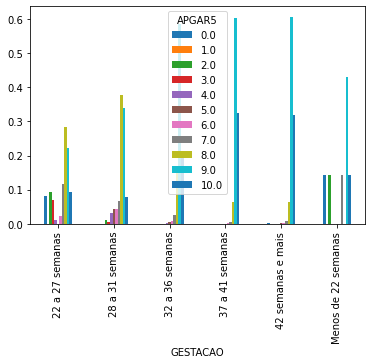

In [14]:
freq_pctlin.plot.bar()

In [ ]:
#Sim corrobora com a visão dos médicos, pois nesse caso a maioria dos valores do APGAR5 fica abaixo de 8, valor considerado normal

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

0.25    2965.0
0.50    3270.0
0.75    3575.0
Name: PESO, dtype: float64
       PESO            class_peso
0      3685  muito acima da média
1      3055  peso abaixo da média
2      3460   peso acima da média
3      2982  peso abaixo da média
4      3310   peso acima da média
...     ...                   ...
27023  2110          muito abaixo
27024  3310   peso acima da média
27025  3065  peso abaixo da média
27026  2352          muito abaixo
27027  4240  muito acima da média

[27028 rows x 2 columns]
class_peso  muito abaixo  muito acima da média  peso abaixo da média  \
APGAR5                                                                 
0.0                   12                     1                     3   
1.0                    9                     6                     3   
2.0                   15                     3                     0   
3.0                   11                     1                     2   
4.0                   16                     1                

<AxesSubplot:xlabel='APGAR5'>

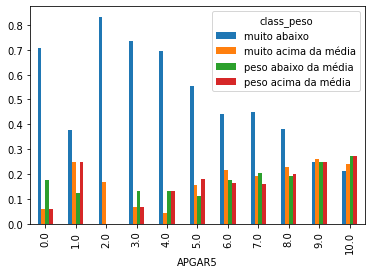

In [26]:
#descobrindo os quartis para categorizar em faixas de peso
print(df['PESO'].quantile([0.25,0.5,0.75]))
p1=2965.0
p2=3270.0
p3=3575.0
#categorizando
df.loc[(df['PESO'] <= p1), 'class_peso'] = 'muito abaixo'
df.loc[(df['PESO'] > p1) & (df['PESO'] <= p2), 'class_peso'] = 'peso abaixo da média'
df.loc[(df['PESO'] > p2) & (df['PESO'] <=p3), 'class_peso'] = 'peso acima da média'
df.loc[(df['PESO'] > p3), 'class_peso'] = 'muito acima da média'
print(df[['PESO','class_peso']])
#agora plotar class_peso x apgar5
freq_peso = pd.crosstab(df['APGAR5'],df['class_peso'])
print(freq_peso)
print(freq_peso.sum(1))
freq_pctlin_peso = freq_peso.div(freq_peso.sum(axis = 1), axis = 0)
print(freq_pctlin_peso)
freq_pctlin_peso.plot.bar()

In [ ]:
#como se percebe para oa valores APGAR5 abaixo de 8, prevalecem o peso abaixo da média